In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# transformation Pclass Embarked

In [120]:
dftest = pd.read_csv('C:/MSDA/data245/Coding/data/test.csv')
df = pd.read_csv('C:/MSDA/data245/Coding/data/train.csv')

In [95]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [121]:
def normalization(col):
    min_ = min(col)
    max_ = max(col)
    mean = np.mean(col)
    sd = np.std(col)
    return [(i-mean) / sd if not sd ==0 else i-mean for i in col]
def data_cleaning(df):
    df['EmbarkedS'] = pd.Series(np.zeros(len(df)))
    df['EmbarkedC'] = pd.Series(np.zeros(len(df)))
    df['EmbarkedQ'] = pd.Series(np.zeros(len(df)))
    df['Pclass1'] = pd.Series(np.zeros(len(df)))
    df['Pclass2'] = pd.Series(np.zeros(len(df)))
    df['Pclass3'] = pd.Series(np.zeros(len(df)))
    
    print(df.columns)
    for i in range(len(df)):
        if df.Embarked[i] == 'S':
            df.EmbarkedS[i] = 1
        elif df.Embarked[i] == 'C':
            df.EmbarkedC[i] = 1
        elif df.Embarked[i] == 'Q':
            df.EmbarkedQ[i] = 1        
    for i in range(len(df)):
        if df.Pclass[i] == 1:
            df.Pclass1[i] = 1
        elif df.Pclass[i] == 2:
            df.Pclass2[i] = 1
        elif df.Pclass[i] == 3:
            df.Pclass3[i] = 1        
    df.drop(columns=['PassengerId','Name','Ticket','Cabin', 'Embarked', 'Pclass'], inplace = True) # drop Cabin ?
    try:
        df = df[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'EmbarkedS', 'EmbarkedC', 'EmbarkedQ','Pclass1', 'Pclass2', 'Pclass3',  'Survived']]
    except:
        pass
    df['Sex'] = df['Sex'].replace(['female', 'male'],[1,0])
    df = df.fillna(0)
    col = df.columns
    for i in col[:-7]:
        df[i] = normalization(df[i])
    return df 

df = data_cleaning(df)
df.describe()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'EmbarkedS',
       'EmbarkedC', 'EmbarkedQ', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')


C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:

,Sex,Age,SibSp,Parch,Fare,EmbarkedS,EmbarkedC,EmbarkedQ,Pclass1,Pclass2,Pclass3,Survived
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.938166e-16,8.142882e-17,-3.905094e-16,-2.006127e-17,6.690620e-16,0.722783,0.188552,0.086420,0.242424,0.206510,0.551066,0.383838
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,0.447876,0.391372,0.281141,0.428790,0.405028,0.497665,0.486592
min,-7.376951e-01,-1.353294e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.376951e-01,-1.012117e+00,-4.745452e-01,-4.736736e-01,-4.891482e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-7.376951e-01,1.141276e-02,-4.745452e-01,-4.736736e-01,-3.573909e-01,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.355574e+00,6.369033e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.355574e+00,3.195728e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


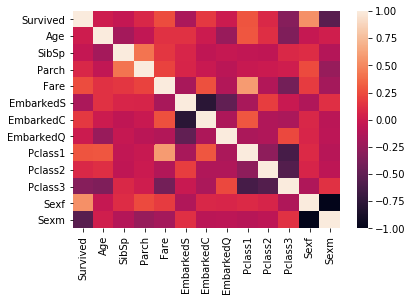

In [91]:
sns.heatmap(df.corr())
# to find the relationship between features. 

In [122]:
def logistic(row, para):
    
    exponent = 0
    for i, j in zip(para, row):
        exponent += i*j
    return 1/(1+np.exp(-exponent))

In [123]:
def LR(X, Y, lr):
    para = [ 1.29922246, -0.29337668, -0.30149844, -0.0455484 ,  0.14572016,
       -3.16498884, -2.73268084, -3.03507468,  2.43291844,  1.77705346,
        0.56724555,  1.15721329] # last one is w0
    for j in range(10000):
        pre = np.zeros(len(X))
        X['w0'] = np.ones(len(X))
        last_para = para.copy()
        print('iterate', j, end = ' ')
        for i in range(len(X)):
            pre[i] = logistic(X.iloc[i].values.tolist(), para)
        errorD = X.T.dot(pre - Y)        
        #print('pre', pre, 'Y', Y, pre - Y)
        para = para - lr * errorD
        if j%10 == 0:
            print()
            print(para)
            #print(errorD)
            #print(sum(pre - Y))
        if round(para[0], 6) == round(last_para[0],6) and round(para[1], 6) == round(last_para[1],6):
            return para
            break
    return para

In [124]:
def predict(query, para, threshold = 0.5):
    pred = logistic(query, para)
    #return pred
    if pred > threshold or pred == threshold:
        return 1
    else:
        return 0
def acc(X, para, threshold):
    #X = data_cleaning(X)
    predicted = list(np.zeros(len(X))) 
    for i in range(len(X)):
        predicted[i] = predict(X.iloc[i],para, threshold) 
    #print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == Y)/len(X))*100,'%')
    return predicted

In [125]:
# Train the model
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
para = LR(X,Y, 0.001)
para

iterate 0 
Sex          1.299223
Age         -0.293378
SibSp       -0.301499
Parch       -0.045549
Fare         0.145719
EmbarkedS   -3.164988
EmbarkedC   -2.732679
EmbarkedQ   -3.035088
Pclass1      2.432920
Pclass2      1.777051
Pclass3      0.567246
w0           1.157213
dtype: float64
iterate 1 iterate 2 iterate 3 iterate 4 iterate 5 iterate 6 iterate 7 

Sex          1.299229
Age         -0.293384
SibSp       -0.301502
Parch       -0.045550
Fare         0.145712
EmbarkedS   -3.164987
EmbarkedC   -2.732668
EmbarkedQ   -3.035176
Pclass1      2.432933
Pclass2      1.777038
Pclass3      0.567248
w0           1.157215
dtype: float64

In [126]:
testX = df.iloc[:, :-1]
testY = df.iloc[:, -1]

def acc_score(testY, pre, threshold):
    pre = acc(testX, para, threshold)
    df0 = pd.DataFrame()
    df0['Y'] = pd.Series(testY)
    df0['predicted'] = pd.Series(pre)
    sum_acc = 0
    for i, j in zip(testY, pre):
        if i == j:
            sum_acc += 1
    return sum_acc/len(testY)

In [130]:
acc_score(testY, pre, 0.5)

0.7833894500561167

In [127]:
listacc = list()
indexdf = range(100)
for i in indexdf:
    listacc.append(acc_score(testY, pre, i/100))

In [118]:
listacc.index(max(listacc))

64

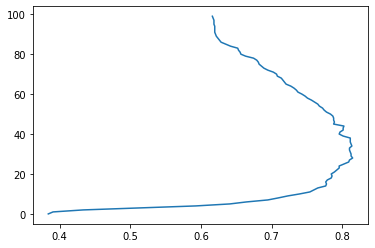

In [129]:
plt.plot(listacc, indexdf)

In [76]:
dftest = pd.read_csv('C:/MSDA/data245/Coding/data/test.csv')

testX = data_cleaning(dftest)
#testY = df.iloc[:, -1]
pre = acc(testX, para, 0.5)
#df0 = pd.DataFrame()
#df0['Y'] = pd.Series(testY)
#df0['predicted'] = pd.Series(pre)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'EmbarkedS', 'EmbarkedC',
       'EmbarkedQ', 'Pclass1', 'Pclass2', 'Pclass3'],
      dtype='object')


C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Rui7803\anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,


In [75]:
dftest['Survived'] = pd.Series(pre)
dftest1 = pd.DataFrame()
dftest1['PassengerId'] = pd.Series(range(892, 892 + len(dftest)))
dftest1['Survived'] = dftest['Survived']
dftest1.reset_index(drop=True, inplace=True)
dftest1.to_csv('c:\msda\data245\coding\predicted.csv', index=False)
dftest1

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
df0[df0.Y == 1].describe()

,Y,predicted
count,342.0,342.000000
mean,1.0,0.439889
std,0.0,0.279974
min,1.0,0.014005
25%,1.0,0.165077
50%,1.0,0.446109
75%,1.0,0.688659
max,1.0,0.986103


In [45]:
df0[df0.Y == 0].describe()

,Y,predicted
count,549.0,549.000000
mean,0.0,0.105885
std,0.0,0.122951
min,0.0,0.005560
25%,0.0,0.030290
50%,0.0,0.050385
75%,0.0,0.130742
max,0.0,0.820679


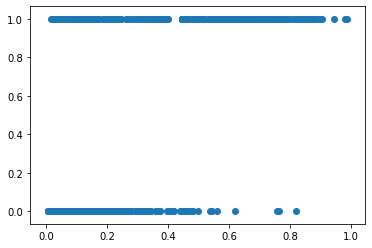

In [46]:
plt.scatter(pre, testY)

0.7138047138047138

In [114]:
para.values

array([-0.29344311, -0.30145546, -0.04546701,  0.14560377, -1.66061839,
       -3.2779874 , -3.57928877,  1.93587389,  1.27968201,  0.06975496,
        1.61376341, -1.10567   , -0.3346933 ])

In [ ]:
0.7383059418457648
